In [8]:
# !pip  install transformers

In [10]:
import transformers

In [12]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
root_path = '/content/sample_data/bbc-text.csv'

In [14]:
df = pd.read_csv(root_path)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [15]:
df.shape

(2225, 2)

# Histogram of the count of text

In [16]:
df['count'] = df['text'].apply(lambda x: len(x.split()))

In [17]:
df.head()

,category,text,count
0,tech,tv future in the hands of viewers with home th...,737
1,business,worldcom boss left books alone former worldc...,300
2,sport,tigers wary of farrell gamble leicester say ...,246
3,sport,yeading face newcastle in fa cup premiership s...,341
4,entertainment,ocean s twelve raids box office ocean s twelve...,260


<Figure size 800x800 with 0 Axes>

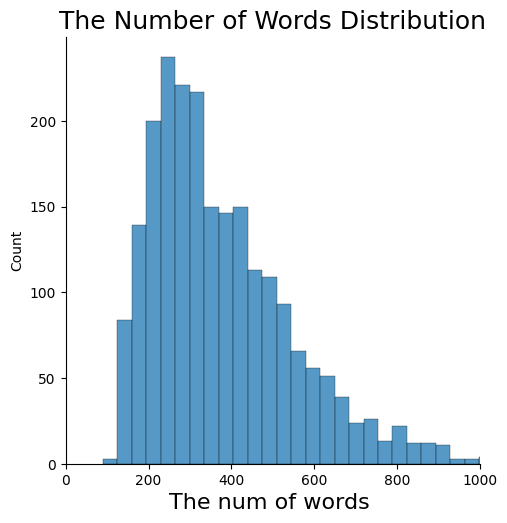

In [18]:
plt.figure(figsize= (8, 8))

sns.displot(df['count'])

plt.xlim(0, 1000)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()



# Bar plot for each of the new category

In [19]:
category_count = df['category'].value_counts()

categories = category_count.index

categories

Index(['sport', 'business', 'politics', 'tech', 'entertainment'], dtype='object', name='category')

In [20]:
category_count

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [21]:
category_count.index

Index(['sport', 'business', 'politics', 'tech', 'entertainment'], dtype='object', name='category')

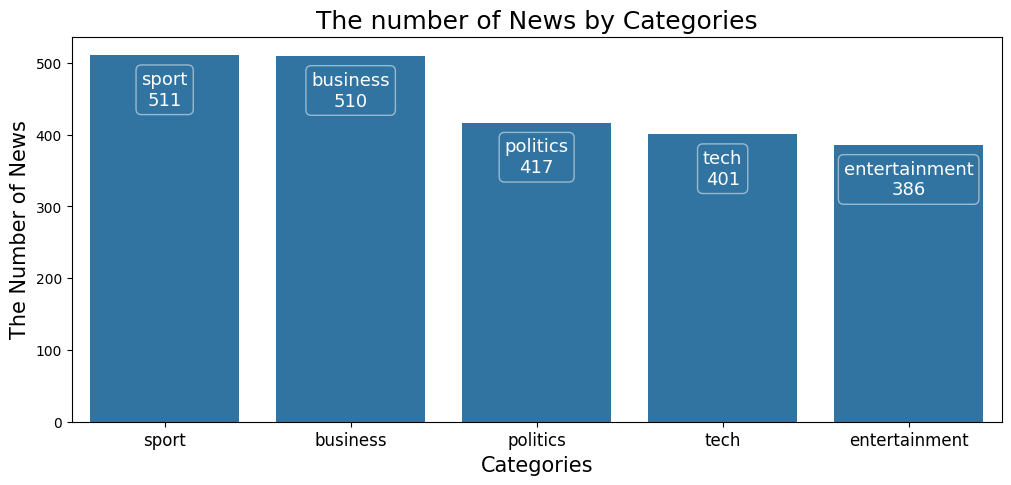

In [22]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [23]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [24]:
df['encoded_text'] = df['category'].astype('category').cat.codes

df.head(10)

,category,text,count,encoded_text
0,tech,tv future in the hands of viewers with home th...,737,4
1,business,worldcom boss left books alone former worldc...,300,0
2,sport,tigers wary of farrell gamble leicester say ...,246,3
3,sport,yeading face newcastle in fa cup premiership s...,341,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1
5,politics,howard hits back at mongrel jibe michael howar...,633,2
6,politics,blair prepares to name poll date tony blair is...,269,2
7,sport,henman hopes ended in dubai third seed tim hen...,191,3
8,sport,wilkinson fit to face edinburgh england captai...,157,3
9,entertainment,last star wars not for children the sixth an...,237,1


In [25]:
data_texts = df['text'].to_list()

data_labels = df['encoded_text'].to_list()

# Train Test SPlit

In [26]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 0 )



# Model Definition

In [27]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

# Print the encoded tokens for verification
print("Train Encodings:", {key: value[:2] for key, value in train_encodings.items()})
print("Validation Encodings:", {key: value[:2] for key, value in val_encodings.items()})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Train Encodings: {'input_ids': [[101, 4977, 4332, 2006, 1996, 3171, 11084, 2093, 2086, 2044, 1037, 24665, 16284, 2989, 3171, 5325, 4977, 2038, 5102, 2049, 4610, 2000, 17894, 1012, 2004, 2112, 1997, 1037, 11084, 5805, 1011, 3805, 1997, 2459, 2285, 2043, 1996, 2647, 2586, 2097, 5630, 3251, 2000, 2707, 4443, 7566, 1011, 4977, 1055, 3171, 4177, 2031, 2042, 22255, 1996, 6943, 2000, 4009, 3086, 2000, 3522, 10106, 1012, 1996, 4610, 2003, 3652, 3435, 2027, 18292, 1012, 2495, 3798, 2426, 2049, 2402, 1998, 2312, 2313, 2024, 4803, 1012, 12163, 3798, 1999, 7017, 3408, 2024, 5825, 3435, 2875, 2309, 16648, 1012, 14200, 2003, 2104, 2491, 1012, 1037, 2047, 2375, 2000, 21208, 2049, 22609, 8169, 2291, 2003, 2006, 1996, 5329, 1012, 1996, 6813, 3068, 2003, 24716, 1998, 12594, 2013, 5731, 2323, 2062, 2084, 3313, 2000, 1002, 2538, 24700, 1006, 26812, 1012, 1022, 24700, 1007, 1999, 2093, 2086, 1012, 9308, 2231, 5938, 2003, 2275, 2000, 2022, 7708, 1998, 1037, 10859, 14045, 2591, 3036, 15074, 2003, 2108, 26176

In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

# Fine-tuning distilbert-base-uncased

In [52]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_dataset.shuffle(100).batch(16),
          epochs=3,
          batch_size=32,
          validation_data=val_dataset.batch(64))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
111/111 [==============================] - 154s 1s/step - loss: 0.4226 - accuracy: 0.9041 - val_loss: 0.0970 - val_accuracy: 0.9798
Epoch 2/3
111/111 [==============================] - 107s 969ms/step - loss: 0.0940 - accuracy: 0.9784 - val_loss: 0.0596 - val_accuracy: 0.9843
Epoch 3/3
111/111 [==============================] - 107s 967ms/step - loss: 0.0497 - accuracy: 0.9875 - val_loss: 0.0609 - val_accuracy: 0.9820


# Saving & Loading the model

In [41]:
# Optional: Save the model
model.save_pretrained('./saved_model')

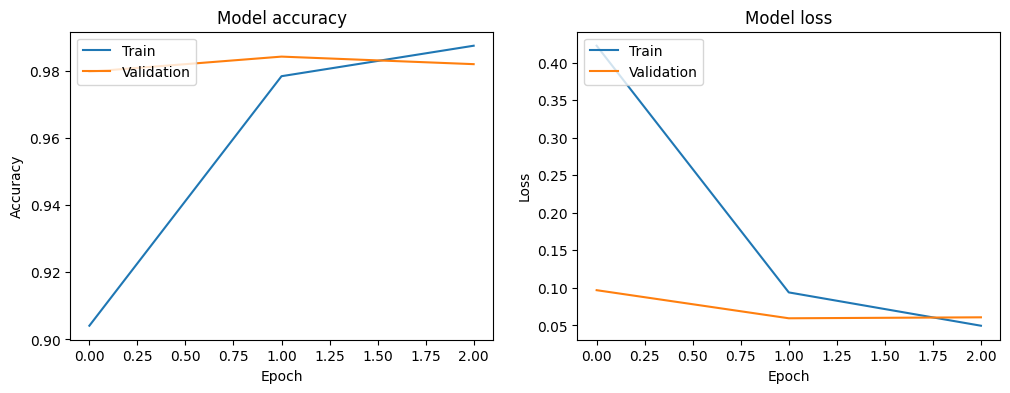

In [54]:

# Optional: Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)

# Loading Pre-Trained Model and Predicting Test Data

In [46]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the input texts
test_encodings = tokenizer(test_texts, truncation = True, padding = True, return_tensors = 'tf')

# Load the trained model (assuming you have saved it)
model = TFDistilBertForSequenceClassification.from_pretrained('./saved_model')

# Make predictions
predictions = model.predict(test_encodings)

# Process the predictions to get class labels
predicted_classes = tf.argmax(predictions.logits, axis=-1).numpy()

# Print the predictions
for text, pred in zip(test_texts, predicted_classes):
    print(f"Text: {text}\nPredicted class: {pred}\n")


Some layers from the model checkpoint at ./saved_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_139']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./saved_model and are newly initialized: ['dropout_199']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 6s 6s/step
Text: dollar hovers around record lows the us dollar hovered close to record lows against the euro on friday as concern grows about the size of the us budget deficit.  analysts predict that the dollar will remain weak in 2005 as investors worry about the state of the us economy. the bush administration s apparent unwillingness to intervene to support the dollar has caused further concern. however  trading has been volatile over the past week because of technical and automated trading and light demand. this has amplified reactions to news  analysts said  adding that they expect markets to become less jumpy in january.  the dollar was trading at $1.3652 versus the euro on friday morning after hitting a fresh record low of $1.3667 on thursday. one dollar bought 102.55 yen.  disappointing business figures from chicago triggered the us currency s weakness on thursday. the national association of purchasing management-chicago said its manufac